# El pozo 1D

$$
{\bf H}= -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} +  U(x)
$$

$$
    U(x)=\left \{ _{0}^{-u_0}\;^{|x|<a}_{|x|>a}\right.
$$

De manera que los autoestados del sistema satisfacen la ecuación
${\bf H}\Psi(x)= E \Psi(x)$



## Soluciones pares


Consideremos primero las soluciones "pares"

$$
\Psi_k(x)=\left\{_{{\cal N}_k e^{-|x|\alpha}\cos(k a)}^{{\cal N}_k e^{-a \alpha}\cos(k x)}\;^{|x|<a}_{|x|>a}\right.
$$

con $E_k=-\frac{\hbar^2}{2 m}\alpha^2  = \frac{\hbar^2}{2 m}k^2 - U_0$ y ${\cal N}_k^{-2}=\int_{-\infty}^{\infty} \Psi_k(x)^*\Psi_k(x) dx$

La condición de continuidad de la derivada de $\Psi_k(x)$ implica que
\begin{eqnarray}
-k \sin(k a)&=& -\alpha \cos(k a)\\
\tan(k a)&=& \frac{\alpha}{k} \\
\tan(k a)&=& \sqrt{\frac{2m U_0}{\hbar^2 k^2}-1} \\
\tan^2(k a)+1&=&\frac{2m U_0}{\hbar^2 k^2} \geq 1 \\
\tan^2(k a)+1&=&\frac{2m U_0 a^2 }{\hbar^2 (k a)^2} \;\;\;\;   0\leq k a \leq  \frac{\sqrt{2m U_0} a}{\hbar} 
\end{eqnarray}


además, como $\tan(ka)$ debe ser positiva,  $ka \in ( n \pi, (n+\frac{1}{2}) \pi )$ para algún entero no negativo $n=0, 1,\ldots$

In [1]:
#Soluciones
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optim


def find_even_solutions(Ured,a):
    #Build the set of intervals with negative cot
    kamax = np.sqrt(Ured)
    nintervals=int(kamax/3.1415926+1)
    intervals = [ [3.1415926*(i)+1.e-3 ,min(3.1415926*(i+.5),kamax)] 
                 for i in range(nintervals)]
    sols=[]
    for i in intervals:
        if i[1]<i[0]:
            continue
        try:
            newsol = optim.brentq(lambda x:(np.tan(x)**2-Ured/x**2+1), i[0],i[1])
            #Check the solution
            if np.abs(np.tan(newsol)-np.sqrt(Ured/newsol**2-1)) >1e-3:
                continue
        except:
            continue
        yetfound = False
        for q in sols:
            if np.abs(q-newsol)<1e-3:
                yetfound = True
                break
        if not yetfound:
            sols.append(newsol)
    return np.array([s/a for s in sols])


def psi_even(x,k,Ured,a):
    alpha= np.sqrt(Ured/a**2-k**2)
    if x<0:
        x=-x
    if x<a:
        return (.1*Ured/a**2)*np.cos(k*x)+ k**2 - Ured/a**2
    else:
        return (.1*Ured/a**2)* np.cos(k*a)*np.exp(-alpha*(x-a)) + k**2 - Ured/a**2


%matplotlib inline

def makeplot_even_sol(Ured,a):
    xvals=np.linspace(-3,3,160)
    #Ured=.1
    #a=.1
    psis=[np.array([psi_even(x,k,Ured,a) for x in xvals])   
          for k in find_even_solutions(Ured,a)]
    f1=plt.subplot(121)
    pot=np.array([ -Ured/a**2 if abs(x)<a else 0. for x in xvals])
    f1.plot(xvals,pot)
    for psik in psis:
        f1.plot(xvals,psik) 
    plt.ylim(-1.1*Ured/a**2,.2*Ured/a**2)
    plt.title("Ured="+str(Ured))

    f2=plt.subplot(122)
    sols = find_even_solutions(Ured,a) 
    kas=np.linspace(0.01,np.sqrt(Ured)/a+1,2000)
    gtan=np.array([np.tan(ka) for ka in kas ])
    ghyp=np.array([np.sqrt(Ured/ka**2-1) for ka in kas ])
    f2.plot(kas,gtan)
    f2.plot(kas,ghyp)
    f2.scatter(a*sols,[np.tan(a*s) for s in sols],c='r')
    plt.ylim(-4,4)



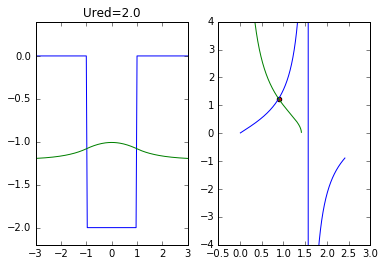

In [2]:
makeplot_even_sol(2.,1.)

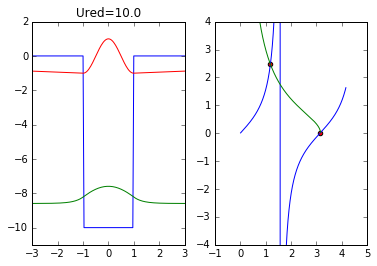

In [3]:
makeplot_even_sol(10.,1.)

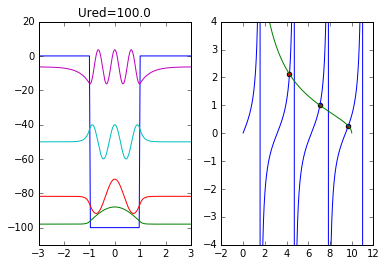

In [4]:
makeplot_even_sol(100.,1.)

## Soluciones Impares


Consideremos primero las soluciones "Impares"

$$
\Psi_k(x)=\left\{_{{\cal N}_k e^{-|x|\alpha}\sin(k a)}^{{\cal N}_k e^{-a \alpha}\sin(k x)}\;^{|x|<a}_{|x|>a}\right.
$$

con $E_k=-\frac{\hbar^2}{2 m}\alpha^2  = \frac{\hbar^2}{2 m}k^2 - U_0$ y ${\cal N}_k^{-2}=\int_{-\infty}^{\infty} \Psi_k(x)^*\Psi_k(x) dx$

La condición de continuidad de la derivada de $\Psi_k(x)$ implica que
\begin{eqnarray}
k \cos(k a)&=& -\alpha \sin(k a)\\
-\cot(k a)&=& \frac{\alpha}{k} \\
-\cot(k a)&=& \sqrt{\frac{2m U_0}{\hbar^2 k^2}-1} \\
\cot^2(k a)+1&=&\frac{2m U_0}{\hbar^2 k^2} \geq 1 \\
\cot^2(k a)+1&=&\frac{2m U_0 a^2 }{\hbar^2 (k a)^2} \;\;\;\;   0\leq k a \leq  \frac{\sqrt{2m U_0} a}{\hbar} 
\end{eqnarray}

además, como $-\cot(ka)$ debe ser positiva,  $ka \in ( (n+\frac{1}{2}) \pi, (n+1) \pi )$ para algún entero no negativo $n=0, 1,\ldots$

In [5]:
def find_odd_solutions(Ured,a):
    #Build the set of intervals with negative cot
    kamax = np.sqrt(Ured)
    nintervals=int(kamax/3.1415926+1)
    intervals = [ [3.1415926*(i+.5) ,min(3.1415926*(i+1.),kamax)] 
                 for i in range(nintervals)]
    sols=[]
    for i in intervals:
        if i[1]<i[0]:
            continue
        try:
            newsol = optim.brentq(lambda x:(1./np.tan(x)**2-Ured/x**2+1), i[0],i[1])
            #Check the solution
            if np.abs(-1./np.tan(newsol)-np.sqrt(Ured/newsol**2-1)) >1e-3:
                continue
        except:
            continue
        yetfound = False
        for q in sols:
            if np.abs(q-newsol)<1e-3:
                yetfound = True
                break
        if not yetfound:
            sols.append(newsol)
    return np.array([s/a for s in sols])

def psi_odd(x,k,Ured,a):
    alpha= np.sqrt(Ured/a**2-k**2)
    sign=1.
    if x<0:
        x=-x
        sign=-1.
    if x<a:
        return sign*(.1*Ured/a**2)*np.sin(k*x)+ k**2 - Ured/a**2
    else:
        return sign*(.1*Ured/a**2)* np.sin(k*a)*np.exp(-alpha*(x-a)) + k**2 - Ured/a**2


%matplotlib inline

def makeplot_odd_sol(Ured,a):
    xvals=np.linspace(-3,3,160)
    #Ured=.1
    #a=.1
    psis=[np.array([psi_odd(x,k,Ured,a) for x in xvals])   
          for k in find_odd_solutions(Ured,a)]
    f1=plt.subplot(121)
    pot=np.array([ -Ured/a**2 if abs(x)<a else 0. for x in xvals])
    f1.plot(xvals,pot)
    for psik in psis:
        f1.plot(xvals,psik) 
    plt.ylim(-1.1*Ured/a**2,.2*Ured/a**2)
    plt.title("Ured="+str(Ured))

    f2=plt.subplot(122)
    sols = find_odd_solutions(Ured,a) 
    kas=np.linspace(0.01,np.sqrt(Ured)/a+1,2000)
    gtan=np.array([-1./np.tan(ka) for ka in kas ])
    ghyp=np.array([np.sqrt(Ured/ka**2-1) for ka in kas ])
    f2.plot(kas,gtan)
    f2.plot(kas,ghyp)
    f2.scatter(a*sols,[-1./np.tan(a*s) for s in sols],c='r')
    plt.ylim(-4,4)


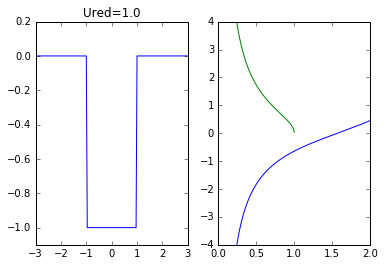

In [6]:
 makeplot_odd_sol(1.,1.)

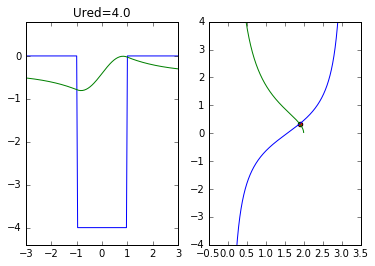

In [7]:
 makeplot_odd_sol(4.,1.)

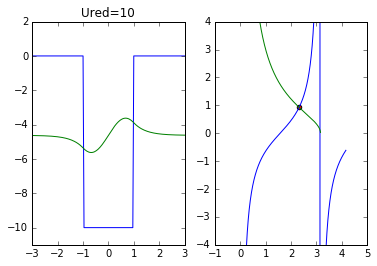

In [8]:
 makeplot_odd_sol(10,1.)

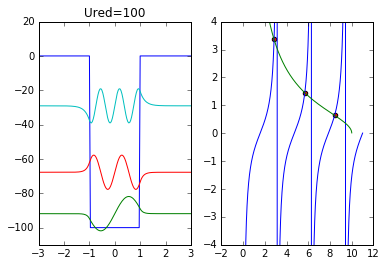

In [9]:
 makeplot_odd_sol(100,1.)

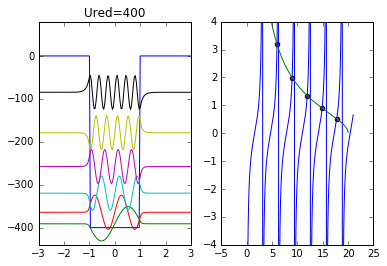

In [10]:
 makeplot_odd_sol(400,1.)

## Pozo de potecial esférico (caso L=0)

Para el caso del pozo de potencial esférico, en el sector l=0, la ec. de Schrödinger se reduce a
$$
-\frac{1}{r} \frac{\partial^2}{\partial r^2} (r\Psi(r))-\frac{2 m E}{\hbar^2}   \Psi(r)=0
$$
o, introduciendo $R(r)=r \Psi(r)$,


$$
-\frac{\partial^2}{\partial r^2} R(r)-\frac{2 m E}{\hbar^2}   R(r)=0
$$

que es la ecuación de un pozo unidimensional. Notamos además que para que $\Psi$ sea regular,  $R(0)=0$. Luego, las soluciones coincidirán con las soluciones impares del pozo de potencial unidimensional.

In [11]:
def find_radial_lzero_solutions(Ured,a):
    #Build the set of intervals with negative cot
    kamax = np.sqrt(Ured)
    nintervals=int(kamax/3.1415926+1)
    intervals = [ [3.1415926*(i+.5) ,min(3.1415926*(i+1.),kamax)] 
                 for i in range(nintervals)]
    sols=[]
    for i in intervals:
        if i[1]<i[0]:
            continue
        try:
            newsol = optim.brentq(lambda x:(1./np.tan(x)**2-Ured/x**2+1), i[0],i[1])
            #Check the solution
            if np.abs(-1./np.tan(newsol)-np.sqrt(Ured/newsol**2-1)) >1e-3:
                continue
        except:
            continue
        yetfound = False
        for q in sols:
            if np.abs(q-newsol)<1e-3:
                yetfound = True
                break
        if not yetfound:
            sols.append(newsol)
    return np.array([s/a for s in sols])

def psi_radial_lzero(x,k,Ured,a):
    alpha= np.sqrt(Ured/a**2-k**2)
    sign=1.
    if x<a:
        return (.1*Ured/a**2)*np.sin(k*x)/x+ k**2 - Ured/a**2
    else:
        return (.1*Ured/a**2)* np.sin(k*a)*np.exp(-alpha*(x-a))/x + k**2 - Ured/a**2


%matplotlib inline

def makeplot_radial_lzero_sol(Ured,a):
    xvals=np.linspace(0,3,160)
    #Ured=.1
    #a=.1
    psis=[np.array([psi_radial_lzero(x,k,Ured,a) for x in xvals])   
          for k in find_radial_lzero_solutions(Ured,a)]
    f1=plt.subplot(121)
    pot=np.array([ -Ured/a**2 if abs(x)<a else 0. for x in xvals])
    f1.plot(xvals,pot)
    for psik in psis:
        f1.plot(xvals,psik) 
    plt.ylim(-1.1*Ured/a**2,.2*Ured/a**2)
    plt.title("Ured="+str(Ured))

    f2=plt.subplot(122)
    sols = find_radial_lzero_solutions(Ured,a) 
    kas=np.linspace(0.01,np.sqrt(Ured)/a+1,2000)
    gtan=np.array([-1./np.tan(ka) for ka in kas ])
    ghyp=np.array([np.sqrt(Ured/ka**2-1) for ka in kas ])
    f2.plot(kas,gtan)
    f2.plot(kas,ghyp)
    f2.scatter(a*sols,[-1./np.tan(a*s) for s in sols],c='r')
    plt.ylim(-4,4)


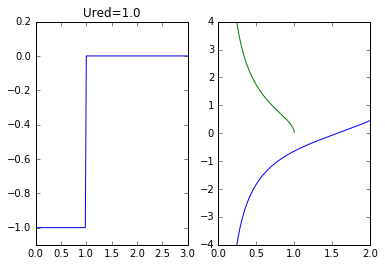

In [12]:
makeplot_radial_lzero_sol(1.,1.)

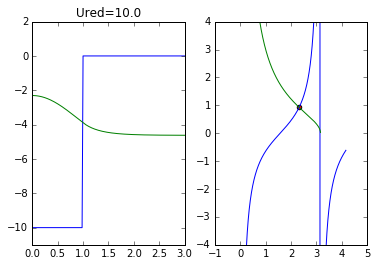

In [13]:
makeplot_radial_lzero_sol(10.,1.)

## Pozo de potecial esférico (caso L>0)

Si ahora l>0, la ec. de Schrödinger incluye ahora un "potencial centrífugo"
$$
-\frac{1}{r} \frac{\partial^2}{\partial r^2} (r\Psi(r))+ \frac{l(l+1)}{r^2}\Psi(r)- \frac{2 m E}{\hbar^2}  \Psi(r)=0
$$
o, introduciendo $R(r)=r \Psi(r)$,


$$
-\frac{\partial^2}{\partial r^2} R(r)+ \frac{l(l+1)}{r^2} R(r)-  \frac{2 m E}{\hbar^2}  R(r)=0
$$ 

El término en $1/r^2$ puede verse como una "corrección" a la solución con $l=0$.  Además,  como $1/r^2$ es un operador positivo ($\int \frac{\Psi^*(r)\Psi(r)}{r^2}d^3 r >0$), esta solución sólo puede aumentar la energía mínima:

$$
\min_{\Psi} \frac{\int \Psi^* {\bf H}_l \Psi d^3 r }{\int \Psi^*  \Psi d^3 r }\geq 
\min_{\Psi} \frac{\int \Psi^* {\bf H}_0 \Psi d^3 r }{\int \Psi^*  \Psi d^3 r } + 
\min_{\Psi} \frac{l(l+1)\int \frac{\Psi^*\Psi}{r^2} d^3 r }{\int \Psi^*  \Psi d^3 r }>
\min_{\Psi} \frac{\int \Psi^* {\bf H}_0 \Psi d^3 r }{\int \Psi^*  \Psi d^3 r }\geq E_0
$$



In [14]:
import scipy.special as sf

def psi_radial(r,k,l,Ured,a):
    alpha= np.sqrt(Ured/a**2-k**2)
    scale=(.1*Ured/a**2)
    e0= k**2 - Ured/a**2
    if r<a:
        return scale*(sf.sph_jn(l,k*r)[0][-1])+e0
    else:
        return scale*(sf.sph_jn(l,k*a)[0][-1]*
                      sf.sph_kn(l,k*r)[0][-1]/sf.sph_kn(l,k*a)[0][-1]) + e0


def lncondition(ka,l,Ured,a):
    alphaa= np.sqrt(Ured-ka**2)/a**2
    val=sf.sph_jn(l,ka)
    lnder_left= ka * val[1][-1]/val[0][-1]
    val=sf.sph_kn(l,ka)
    lnder_right= alphaa * val[1][-1]/val[0][-1]
    val=lnder_left-lnder_right
    return val/(1+abs(val))


def find_radial_solutions(l,Ured,a):
    #Build the set of intervals with negative cot
    kamax = np.sqrt(Ured)
    nintervals=10*int(kamax +1)
    intervals = [ [.1*i+1.e-3 ,min(.1*(i+1),kamax)] for i in range(nintervals)]
    sols=[]
    for i in intervals:
        if i[1]<i[0]:
            continue
        try:
            newsol = optim.brentq(lambda x:(lncondition(x,l,Ured,a)), i[0],i[1])
            #Check the solution
            if newsol==0 :
                continue
            if np.abs(lncondition(newsol,l,Ured,a)) >1e-3:
                continue
        except:
            continue
        yetfound = False
        for q in sols:
            if np.abs(q-newsol)<1e-3:
                yetfound = True
                break
        if not yetfound:
            sols.append(newsol)
    return np.array([s/a for s in sols])


def makeplot_radial_solutions(l,Ured,a,color=None):
    xvals=np.linspace(0,3,160)
    #Ured=.1
    #a=.1
    psis=[np.array([psi_radial(x,k,l,Ured,a) for x in xvals])   
          for k in find_radial_solutions(l,Ured,a)]
    f1=plt.subplot(111)
    pot=np.array([ -Ured/a**2 if abs(x)<a else 0. for x in xvals])
    f1.plot(xvals,pot,'g--')
    for psik in psis:
        gg=f1.plot(xvals,psik,c=color,label="l="+str(l)) 
    plt.ylim(-1.1*Ured/a**2,.2*Ured/a**2)
    plt.title("Ured="+str(Ured))
    return gg
    #plt.label()
    #f2=plt.subplot(122)
    #sols = find_radial_solutions(l,Ured,a) 
    #kas=np.linspace(0.01,np.sqrt(Ured)/a+1,2000)
    #gtan=np.array([lncondition(ka,l,Ured,a) for ka in kas ])
    #f2.scatter(kas,gtan)
    #f2.scatter(a*sols,[lncondition(s*a,l,Ured,a) for s in sols],c='r')
    #plt.ylim(-4,4)


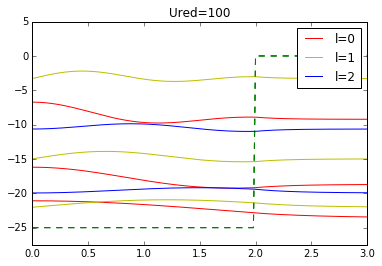

In [15]:
# Show together the solutions with each value of l
g1=makeplot_radial_solutions(0,100,2.,color='r')

g2=makeplot_radial_solutions(1,100,2.,color='y')

g3=makeplot_radial_solutions(2,100,2.,color='b')

handlrs,labls=(plt.legend().parent.get_legend_handles_labels())
handlrs.pop(0)
labls.pop(0)
handlrs.pop(0)
labls.pop(0)
handlrs.pop(2)
labls.pop(2)
handlrs.pop(2)
labls.pop(2)
handlrs.pop(3)
labls.pop(3)
plt.legend(handlrs, labls)
plt.show()